In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## mAP 50 

In [60]:
csv_path = "./runs/stats/flower_dataset_stats.csv"
metric = "map50_mean"
std_col = "map50_95_std"
top_k = 25

In [61]:
df = pd.read_csv(csv_path, sep=",")

In [62]:
df

,model,dataset_name,precision_mean,recall_mean,f1_mean,map50_mean,map50_95_mean,map50_95_std,instances_total,images_total,n_runs
0,yolo11l,dataset_database_active_learning,0.788675,0.935308,0.855108,0.946022,0.625415,0.023812,6576,1359,6
1,yolo11l,dataset_database_active_learning_bg1,0.771520,0.947168,0.848182,0.951212,0.631438,0.020995,6576,1359,6
2,yolo11l,dataset_database_active_learning_bg5,0.816662,0.938710,0.872810,0.955660,0.624722,0.015971,6576,1359,6
3,yolo11l,dataset_database_only_flowers,0.906893,0.889118,0.897763,0.953553,0.644515,0.017827,6573,1362,6
4,yolo11l,dataset_database_only_flowers_bg1,0.887033,0.877648,0.882137,0.944602,0.612802,0.029333,6573,1362,6
...,...,...,...,...,...,...,...,...,...,...,...
67,yolov8s,dataset_database_active_learning_bg1,0.814887,0.943728,0.873417,0.953498,0.635220,0.017009,6576,1359,6
68,yolov8s,dataset_database_active_learning_bg5,0.776287,0.947903,0.851418,0.954712,0.628428,0.017385,6576,1359,6
69,yolov8s,dataset_database_only_flowers,0.891553,0.906348,0.898830,0.944442,0.624792,0.016396,6573,1362,6
70,yolov8s,dataset_database_only_flowers_bg1,0.899072,0.901575,0.899985,0.952652,0.631568,0.018276,6573,1362,6


In [63]:
# ===== TRI =====
df = df.sort_values(metric, ascending=False)

# ===== NORMALISATION MIN-MAX =====
min_val = df[metric].min()
max_val = df[metric].max()

df["metric_norm"] = (df[metric] - min_val) / (max_val - min_val)

# adapter les écarts-types à la normalisation
df["std_norm"] = df[std_col] / (max_val - min_val)
df["mod+dataset"] = df["model"]+"_"+df["dataset_name"]

In [64]:
mean_val = df[metric].mean()
std_val = df[metric].std()

df["metric_zscore"] = (df[metric] - mean_val) / std_val
df["std_zscore"] = df[std_col] / std_val

In [65]:
df_top = df.head(top_k).copy()

In [66]:
values = df_top["metric_zscore"].values
stds = df_top["std_zscore"].values

lower_err = np.zeros_like(stds)
upper_err = stds

yerr = [lower_err, upper_err]

In [67]:
yerr

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.50599004, 0.55110411, 0.30959875, 0.67455467, 0.58884291,
        0.70036507, 0.75597073, 0.77096992, 0.7623678 , 0.45512331,
        0.78172726, 0.74586121, 0.67535023, 0.80145176, 0.77404521,
        0.20726022, 1.00339226, 0.92066612, 0.58169603, 0.40544136,
        0.65092149, 0.82250398, 0.66709718, 0.52535354, 1.12563316])]

In [68]:
df

,model,dataset_name,precision_mean,recall_mean,f1_mean,map50_mean,map50_95_mean,map50_95_std,instances_total,images_total,n_runs,metric_norm,std_norm,mod+dataset,metric_zscore,std_zscore
25,yolo26l,dataset_database_active_learning_bg1,0.835573,0.938378,0.883637,0.958588,0.641235,0.011539,6576,1359,6,1.000000,0.070568,yolo26l_dataset_database_active_learning_bg1,0.823405,0.505990
42,yolo26s,dataset_database_active_learning,0.807563,0.938610,0.866598,0.957555,0.648873,0.012567,6576,1359,6,0.993680,0.076859,yolo26s_dataset_database_active_learning,0.778092,0.551104
43,yolo26s,dataset_database_active_learning_bg1,0.823383,0.921797,0.867810,0.957013,0.645505,0.007060,6576,1359,6,0.990368,0.043178,yolo26s_dataset_database_active_learning_bg1,0.754338,0.309599
66,yolov8s,dataset_database_active_learning,0.832300,0.942020,0.882855,0.956545,0.642003,0.015383,6576,1359,6,0.987503,0.094076,yolov8s_dataset_database_active_learning,0.733801,0.674555
46,yolo26s,dataset_database_only_flowers_bg1,0.900807,0.881840,0.891138,0.956490,0.644680,0.013428,6573,1362,6,0.987167,0.082123,yolo26s_dataset_database_only_flowers_bg1,0.731389,0.588843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,yolo26n,dataset_database_only_flowers_bg5,0.849705,0.831692,0.840402,0.912735,0.564973,0.020893,6573,1362,6,0.719571,0.127778,yolo26n_dataset_database_only_flowers_bg5,-1.187349,0.916209
32,yolo26m,dataset_database_active_learning_bg5,0.776415,0.862405,0.810785,0.888877,0.550142,0.078057,6576,1359,6,0.573659,0.477380,yolo26m_dataset_database_active_learning_bg5,-2.233582,3.422956
59,yolov8m,dataset_database_only_flowers_bg5,0.850870,0.850045,0.847732,0.887747,0.569447,0.095931,6573,1362,6,0.566749,0.586690,yolov8m_dataset_database_only_flowers_bg5,-2.283134,4.206741
26,yolo26l,dataset_database_active_learning_bg5,0.830803,0.837200,0.831078,0.887080,0.568335,0.106237,6576,1359,6,0.562671,0.649719,yolo26l_dataset_database_active_learning_bg5,-2.312369,4.658671


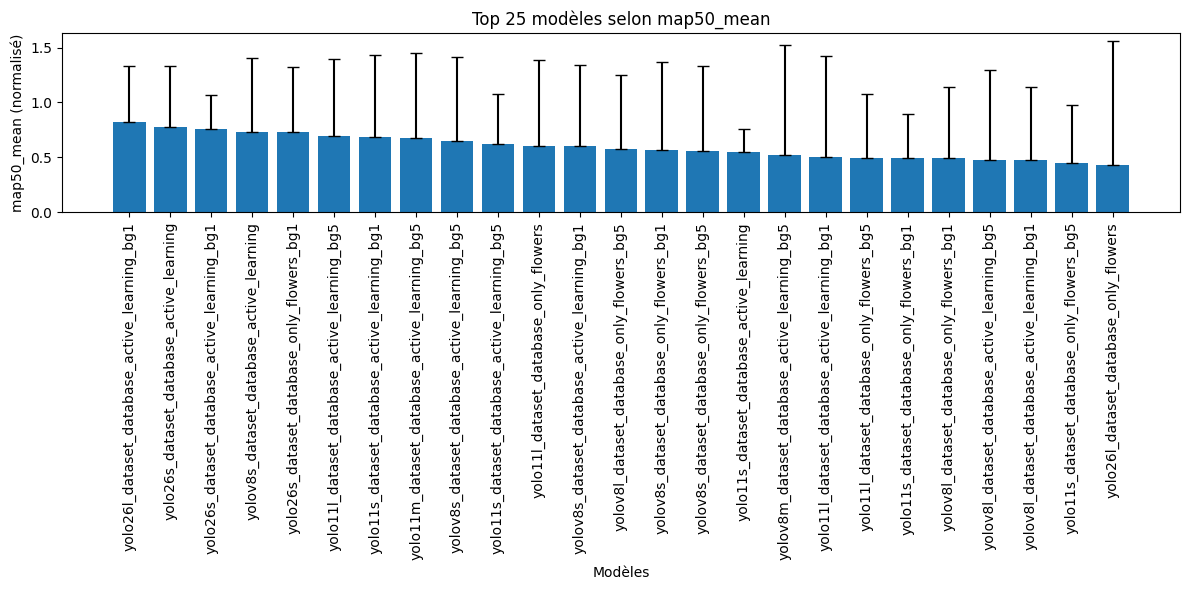

In [69]:
# ===== PLOT =====
plt.figure(figsize=(12,6))

plt.bar(
    df_top["mod+dataset"],
    df_top["metric_zscore"],
    yerr=yerr,
    capsize=4
)

plt.ylabel(f"{metric} (normalisé)")
plt.xlabel("Modèles")
plt.title(f"Top {top_k} modèles selon {metric}")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [70]:
import re

def format_label(name):
    parts = name.split("_")

    # -------- Modèle + taille --------
    raw_model = parts[0]

    size_map = {
        "l": "version large",
        "m": "version medium",
        "s": "version small",
        "n": "version nano"
    }

    if raw_model[-1] in size_map:
        model = raw_model[:-1]
        size = size_map[raw_model[-1]]
        model_label = f"{model} {size}"
    else:
        model_label = raw_model

    # -------- Mode --------
    mode = "hard negative mining" if "active" in parts else None

    # -------- Background --------
    bg_part = next((p for p in parts if p.startswith("bg")), None)

    if bg_part:
        match = re.search(r"\d+", bg_part)
        bg = f"boite(s) sol: {match.group()}" if match else "boite(s) sol"
    else:
        bg = None

    # -------- Construction finale --------
    extras = [x for x in [mode, bg] if x]

    if extras:
        return f"{model_label} : " + " + ".join(extras)
    else:
        return model_label



In [71]:
labels = [format_label(x) for x in df_top["mod+dataset"]]
indices = range(1, len(labels) + 1)

In [72]:
import math

def format_legend_columns(indices, labels, ncol=3, padding=4):
    items = [f"{i}: {lab}" for i, lab in zip(indices, labels)]
    rows = math.ceil(len(items) / ncol)

    # découpe en colonnes verticales
    cols = [items[i*rows:(i+1)*rows] for i in range(ncol)]

    # compléter les colonnes plus courtes
    for col in cols:
        while len(col) < rows:
            col.append("")

    # largeur max de chaque colonne
    col_widths = [
        max(len(item) for item in col)
        for col in cols
    ]

    # construire ligne par ligne
    lines = []
    for r in range(rows):
        line_parts = []
        for c in range(ncol):
            line_parts.append(cols[c][r].ljust(col_widths[c] + padding))
        lines.append("".join(line_parts))

    return "\n".join(lines)

In [73]:
def get_model_family(name):
    base = name.split("_")[0]

    if base.startswith("yolov8"):
        return "yolov8"
    elif base.startswith("yolo11"):
        return "yolo11"
    elif base.startswith("yolo26"):
        return "yolo26"
    else:
        return "other"

In [74]:
color_map = {
    "yolov8": "#1f77b4",   # bleu
    "yolo11": "#2ca02c",   # vert
    "yolo26": "#d62728",   # rouge
    "other":  "#7f7f7f"    # gris fallback
}

In [75]:
families = [get_model_family(x) for x in df_top["mod+dataset"]]
colors = [color_map[f] for f in families]

In [78]:
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor=color_map[name],
          edgecolor="black",
          label=name)
    for name in ["yolov8", "yolo11", "yolo26"]
]

Text(0.01, -0.2, '1: yolo26 version large : hard negative mining + boite(s) sol: 1     10: yolo11 version small : hard negative mining + boite(s) sol: 5     19: yolo11 version large : boite(s) sol: 5                           \n2: yolo26 version small : hard negative mining                       11: yolo11 version large                                              20: yolo11 version small : boite(s) sol: 1                           \n3: yolo26 version small : hard negative mining + boite(s) sol: 1     12: yolov8 version small : hard negative mining + boite(s) sol: 1     21: yolov8 version large : boite(s) sol: 1                           \n4: yolov8 version small : hard negative mining                       13: yolov8 version large : boite(s) sol: 5                            22: yolov8 version large : hard negative mining + boite(s) sol: 5    \n5: yolo26 version small : boite(s) sol: 1                            14: yolov8 version small : boite(s) sol: 1                            23:

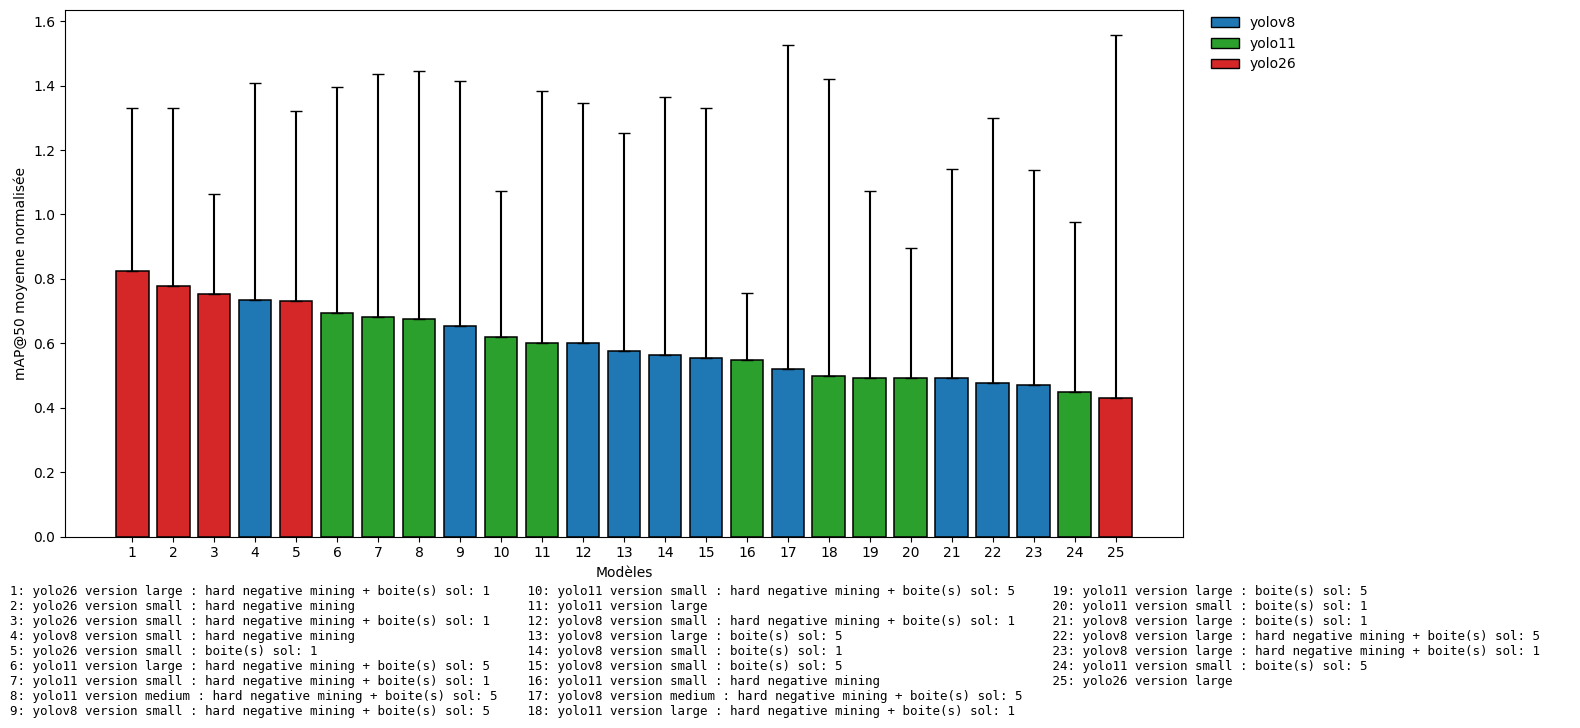

In [86]:
plt.figure(figsize=(12,6))

plt.bar(
    indices,
    df_top["metric_zscore"],
    yerr=yerr,
    capsize=4,
    color=colors,
    edgecolor="black",   # contour noir
    linewidth=1.1
)

plt.ylabel(f"mAP@50 moyenne normalisée")
plt.xlabel("Modèles")
# plt.title(f"Top {top_k} modèles selon {metric}")
plt.xticks(indices)

plt.tight_layout()
legend_text = "\n".join(
    [f"{i} : {label}" for i, label in zip(indices, labels)]
)
plt.legend(
    handles=legend_elements,
    # title="Famille du modèle",
    loc="upper left",            # coin sup. gauche de la légende
    bbox_to_anchor=(1.02, 1),    # à droite, aligné en haut
    borderaxespad=0,
    frameon=False
)
legend_text = format_legend_columns(indices, labels, ncol=3)

plt.figtext(
    0.01,
    -0.20,
    legend_text,
    ha="left",
    fontsize=9,
    family="monospace"
)

## mAP 50-95

In [87]:
metric = "map50_95_mean"
std_col = "map50_95_std"
top_k = 25

In [88]:
# ===== TRI =====
df = df.sort_values(metric, ascending=False)

# ===== NORMALISATION MIN-MAX =====
min_val = df[metric].min()
max_val = df[metric].max()

df["metric_norm"] = (df[metric] - min_val) / (max_val - min_val)

# adapter les écarts-types à la normalisation
df["std_norm"] = df[std_col] / (max_val - min_val)
df["mod+dataset"] = df["model"] +"_"+ df["dataset_name"]

In [89]:
mean_val = df[metric].mean()
std_val = df[metric].std()

df["metric_zscore"] = (df[metric] - mean_val) / std_val
df["std_zscore"] = df[std_col] / std_val

In [90]:
df_top = df.head(top_k).copy()

In [91]:
values = df_top["metric_zscore"].values
stds = df_top["std_zscore"].values

lower_err = np.zeros_like(stds)
upper_err = stds

yerr = [lower_err, upper_err]

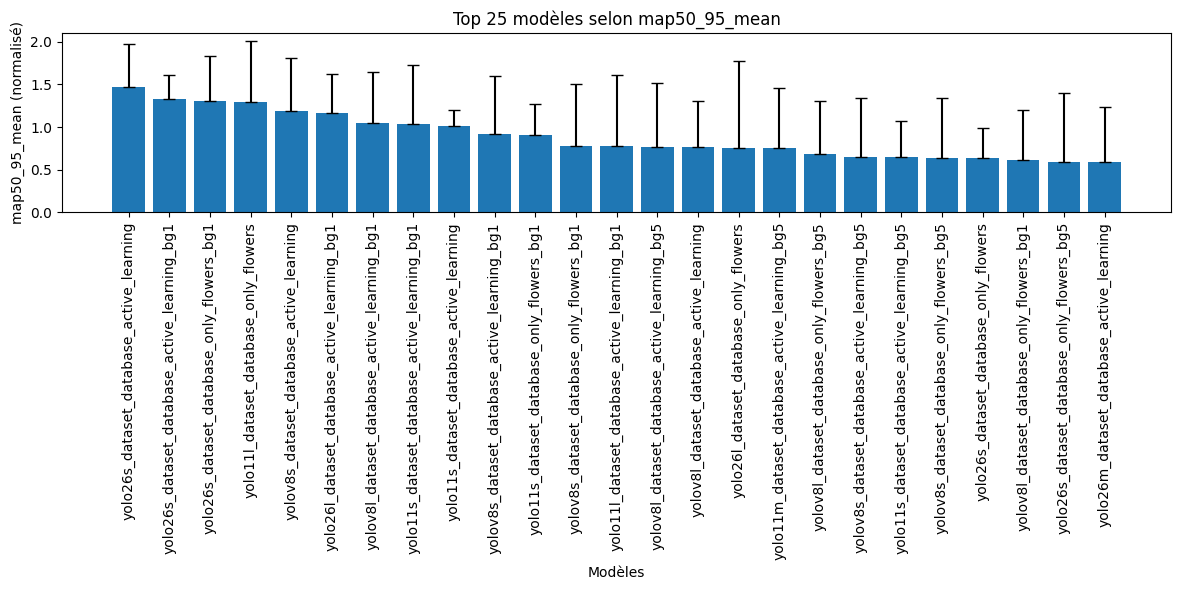

In [92]:
# ===== PLOT =====
plt.figure(figsize=(12,6))

plt.bar(
    df_top["mod+dataset"],
    df_top["metric_zscore"],
    yerr=yerr,
    capsize=4
)

plt.ylabel(f"{metric} (normalisé)")
plt.xlabel("Modèles")
plt.title(f"Top {top_k} modèles selon {metric}")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [93]:
import re

def format_label(name):
    parts = name.split("_")

    # -------- Modèle + taille --------
    raw_model = parts[0]

    size_map = {
        "l": "version large",
        "m": "version medium",
        "s": "version small",
        "n": "version nano"
    }

    if raw_model[-1] in size_map:
        model = raw_model[:-1]
        size = size_map[raw_model[-1]]
        model_label = f"{model} {size}"
    else:
        model_label = raw_model

    # -------- Mode --------
    mode = "hard negative mining" if "active" in parts else None

    # -------- Background --------
    bg_part = next((p for p in parts if p.startswith("bg")), None)

    if bg_part:
        match = re.search(r"\d+", bg_part)
        bg = f"boite(s) sol: {match.group()}" if match else "boite(s) sol"
    else:
        bg = None

    # -------- Construction finale --------
    extras = [x for x in [mode, bg] if x]

    if extras:
        return f"{model_label} : " + " + ".join(extras)
    else:
        return model_label



In [94]:
labels = [format_label(x) for x in df_top["mod+dataset"]]
indices = range(1, len(labels) + 1)

In [95]:
import math

def format_legend_columns(indices, labels, ncol=3, padding=4):
    items = [f"{i}: {lab}" for i, lab in zip(indices, labels)]
    rows = math.ceil(len(items) / ncol)

    # découpe en colonnes verticales
    cols = [items[i*rows:(i+1)*rows] for i in range(ncol)]

    # compléter les colonnes plus courtes
    for col in cols:
        while len(col) < rows:
            col.append("")

    # largeur max de chaque colonne
    col_widths = [
        max(len(item) for item in col)
        for col in cols
    ]

    # construire ligne par ligne
    lines = []
    for r in range(rows):
        line_parts = []
        for c in range(ncol):
            line_parts.append(cols[c][r].ljust(col_widths[c] + padding))
        lines.append("".join(line_parts))

    return "\n".join(lines)

In [96]:
families = [get_model_family(x) for x in df_top["mod+dataset"]]
colors = [color_map[f] for f in families]

Text(0.01, -0.2, '1: yolo26 version small : hard negative mining                      10: yolov8 version small : hard negative mining + boite(s) sol: 1     19: yolov8 version small : hard negative mining + boite(s) sol: 5    \n2: yolo26 version small : hard negative mining + boite(s) sol: 1    11: yolo11 version small : boite(s) sol: 1                            20: yolo11 version small : hard negative mining + boite(s) sol: 5    \n3: yolo26 version small : boite(s) sol: 1                           12: yolov8 version small : boite(s) sol: 1                            21: yolov8 version small : boite(s) sol: 5                           \n4: yolo11 version large                                             13: yolo11 version large : hard negative mining + boite(s) sol: 1     22: yolo26 version small                                             \n5: yolov8 version small : hard negative mining                      14: yolov8 version large : hard negative mining + boite(s) sol: 5     23: yolo

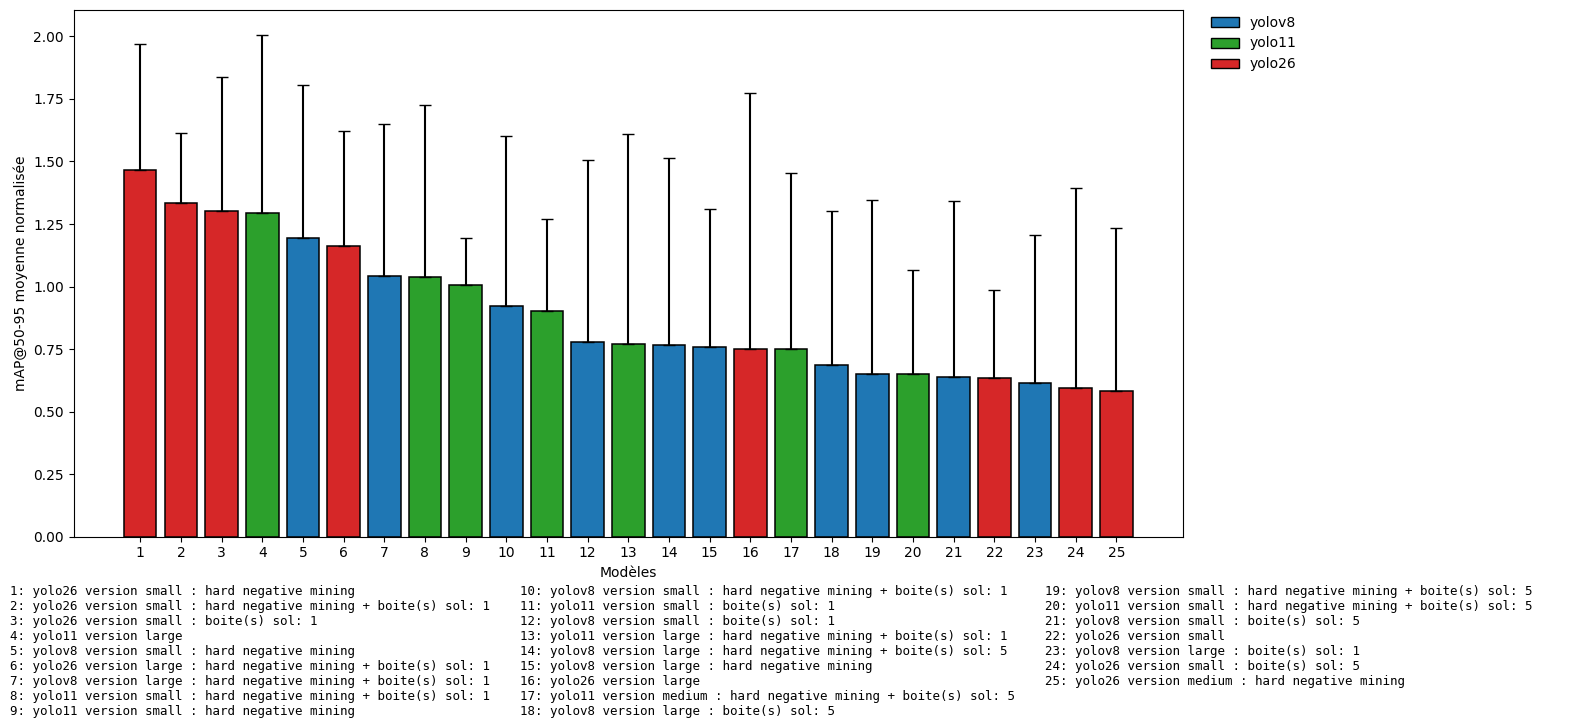

In [97]:
plt.figure(figsize=(12,6))

plt.bar(
    indices,
    df_top["metric_zscore"],
    yerr=yerr,
    capsize=4,
    color=colors,
    edgecolor="black",   # contour noir
    linewidth=1.1
)

plt.ylabel(f"mAP@50-95 moyenne normalisée")
plt.xlabel("Modèles")
# plt.title(f"Top {top_k} modèles selon {metric}")
plt.xticks(indices)

plt.tight_layout()
legend_text = "\n".join(
    [f"{i} : {label}" for i, label in zip(indices, labels)]
)
plt.legend(
    handles=legend_elements,
    # title="Famille du modèle",
    loc="upper left",            # coin sup. gauche de la légende
    bbox_to_anchor=(1.02, 1),    # à droite, aligné en haut
    borderaxespad=0,
    frameon=False
)
legend_text = format_legend_columns(indices, labels, ncol=3)

plt.figtext(
    0.01,
    -0.20,
    legend_text,
    ha="left",
    fontsize=9,
    family="monospace"
)